In this dataset we are predicting the result whether the income is >=50k or <=50k ,so for prediction we use classification and logistic regression method


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('census.csv',names=range(0,15),header=0)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(1449, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1449 non-null   int64 
 1   1       1449 non-null   object
 2   2       1449 non-null   int64 
 3   3       1449 non-null   object
 4   4       1449 non-null   int64 
 5   5       1449 non-null   object
 6   6       1449 non-null   object
 7   7       1449 non-null   object
 8   8       1449 non-null   object
 9   9       1449 non-null   object
 10  10      1449 non-null   int64 
 11  11      1449 non-null   int64 
 12  12      1449 non-null   int64 
 13  13      1449 non-null   object
 14  14      1449 non-null   object
dtypes: int64(6), object(9)
memory usage: 169.9+ KB


In [7]:
df.dtypes

0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
14    object
dtype: object

In [8]:
#changing catagorical to numerical values

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
a=[1,3,5,6,7,8,9,13,14]
for i in a:
    df[i]=le.fit_transform(df[i])

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,6,77516,9,13,4,1,1,4,1,2174,0,40,30,0
1,50,5,83311,9,13,2,4,0,4,1,0,0,13,30,0
2,38,3,215646,11,9,0,6,1,4,1,0,0,40,30,0
3,53,3,234721,1,7,2,6,0,2,1,0,0,40,30,0
4,28,3,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [13]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1444,56,5,145574,11,9,2,8,0,4,1,0,1902,60,30,1
1445,50,3,30447,8,11,2,14,0,4,1,0,0,45,30,0
1446,45,5,256866,15,10,2,12,0,4,1,5013,0,40,30,0
1447,44,5,120837,11,9,2,4,0,4,1,0,0,66,30,0
1448,51,3,185283,15,10,2,4,0,4,1,0,0,45,30,1


In [14]:
df[14].unique()

array([0, 1])

In [15]:
#df[14] is our target variable which denotes whether population is>=50k or<=50k

In [16]:
df.dtypes

0     int64
1     int32
2     int64
3     int32
4     int64
5     int32
6     int32
7     int32
8     int32
9     int32
10    int64
11    int64
12    int64
13    int32
14    int32
dtype: object

In [17]:
x=df.drop(14,axis=1)

In [18]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,39,6,77516,9,13,4,1,1,4,1,2174,0,40,30
1,50,5,83311,9,13,2,4,0,4,1,0,0,13,30
2,38,3,215646,11,9,0,6,1,4,1,0,0,40,30
3,53,3,234721,1,7,2,6,0,2,1,0,0,40,30
4,28,3,338409,9,13,2,10,5,2,0,0,0,40,5


In [19]:
y=df[14].values
y=y.reshape(-1,1)

In [20]:
y.shape

(1449, 1)

In [21]:
x.shape

(1449, 14)

In [22]:
x.skew()

0      0.526539
1     -0.187114
2      1.402935
3     -0.940351
4     -0.325201
5      0.005043
6      0.058423
7      0.821625
8     -2.346488
9     -0.757896
10    16.292565
11     4.175426
12     0.073187
13    -3.757643
dtype: float64

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
#visualizing the data using various techniques

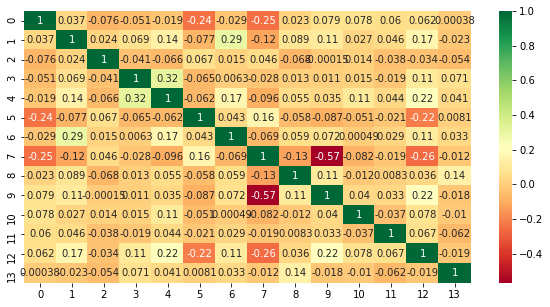

In [25]:
#checking the correlation between the columns using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(),annot=True,cmap='RdYlGn')

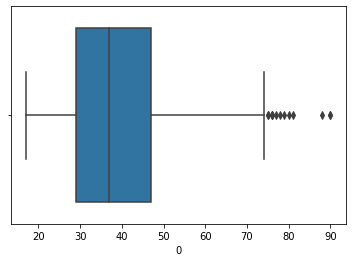

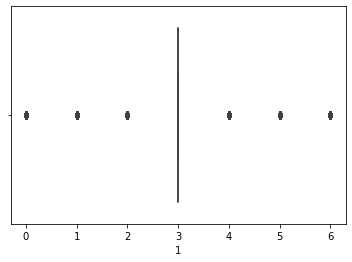

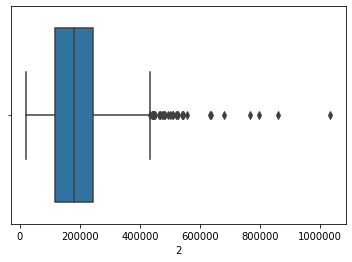

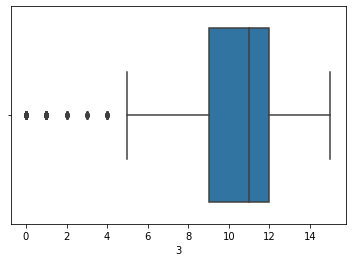

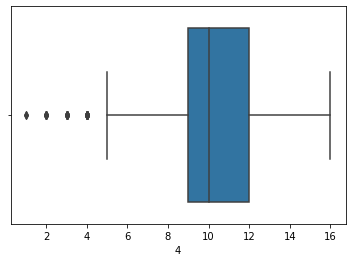

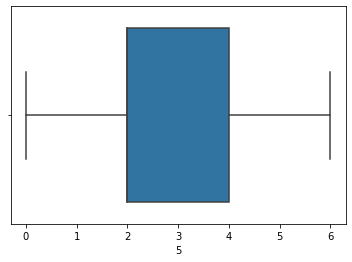

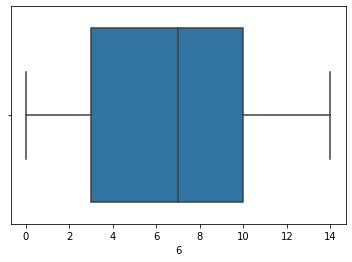

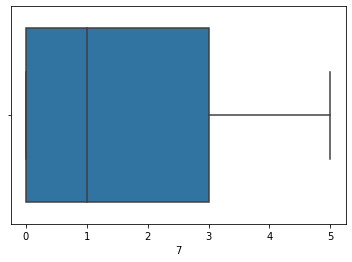

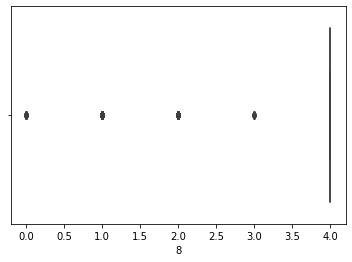

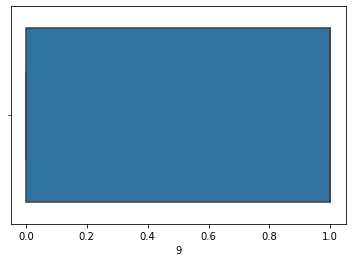

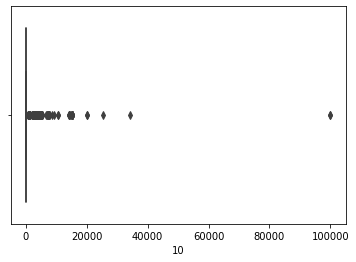

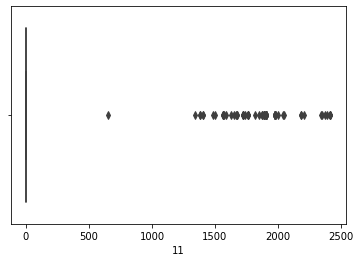

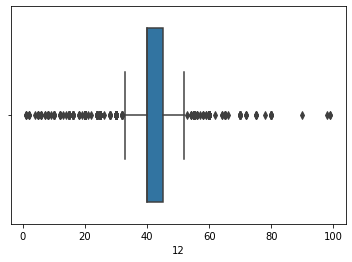

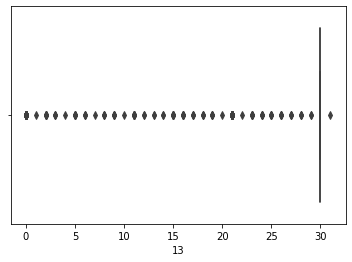

In [26]:
for i in x.columns:
    plt.figure()
    sns.boxplot(x[i])       # shows that some of the columns contain outliers

In [27]:
#removing outliers

In [28]:
from scipy.stats import zscore

In [29]:
z=np.abs(zscore(x))

In [30]:
print(np.where(z>3))

(array([   4,   10,   11,   14,   14,   15,   23,   27,   28,   32,   37,
         38,   51,   52,   61,   74,   77,   81,   84,   93,   93,   93,
         96,   98,  101,  106,  112,  112,  126,  131,  139,  143,  148,
        152,  157,  157,  160,  162,  163,  163,  170,  172,  182,  189,
        192,  200,  208,  212,  213,  215,  221,  222,  222,  224,  226,
        228,  230,  244,  245,  248,  249,  255,  255,  265,  266,  272,
        285,  289,  297,  297,  299,  301,  304,  311,  312,  321,  327,
        363,  381,  387,  393,  404,  405,  408,  413,  414,  416,  426,
        427,  430,  434,  434,  447,  453,  455,  463,  468,  486,  489,
        497,  503,  508,  510,  516,  520,  520,  534,  536,  557,  565,
        573,  588,  589,  591,  593,  596,  597,  607,  619,  624,  632,
        637,  638,  651,  652,  655,  668,  668,  669,  686,  688,  697,
        701,  701,  704,  712,  721,  725,  729,  731,  732,  777,  780,
        781,  786,  799,  799,  801,  824,  827,  

In [31]:
x_new=x[(z<3).all(axis=1)]

In [32]:
x_new.shape

(1216, 14)

In [33]:
x.shape

(1449, 14)

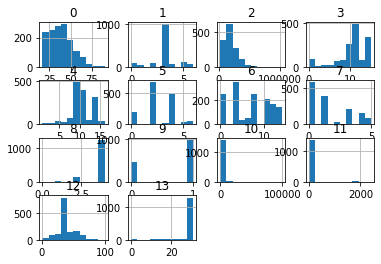

In [34]:
x.hist()  #we can see from the below histogram that skewness is present in the columns
plt.show()

In [35]:
from sklearn.decomposition import PCA

In [36]:
#reducing the no of columns using priciple component analysis
pca=PCA(n_components=9)
x=pca.fit_transform(x)

In [37]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8
0,-114654.328844,1535.413761,-109.077318,-1.158855,-0.866697,-0.905600,-5.011893,0.455251,-3.684534
1,-108860.603967,-641.974986,-115.753136,3.511838,-29.113947,-1.067150,-0.521310,-0.994932,-4.299004
2,23474.371887,-719.592702,-96.573671,-0.050457,0.071956,-1.639223,-0.984007,-0.333738,1.052760
3,42549.368284,-730.777755,-93.783761,14.692893,-4.195398,-0.861692,-1.183527,9.485276,0.065999
4,146237.349650,-791.600694,-78.803029,-8.656261,3.112986,22.684293,4.743011,-1.188907,-2.837369
...,...,...,...,...,...,...,...,...,...
1444,-46597.894594,-685.032040,1795.341512,17.193457,12.081939,-3.286743,-0.175815,0.377612,2.293081
1445,-161724.594430,-610.961215,-123.337243,10.962023,1.982220,-1.395674,7.169626,2.846406,-0.465119
1446,64697.302146,4269.200859,-73.339305,5.616949,-1.878013,-2.551756,5.418396,-4.111292,2.079416
1447,-71334.610962,-663.976015,-110.230798,11.296566,23.430739,-1.265351,-3.995896,0.871474,1.621721


In [38]:
#standardizing the data(mean=0 and std,var=1)
from sklearn.preprocessing import StandardScaler

In [39]:
std=StandardScaler()

In [40]:
x=std.fit_transform(x)
x=pd.DataFrame(data=x)

In [41]:
x

,0,1,2,3,4,5,6,7,8
0,-1.066487,0.344248,-0.260108,-0.087194,-0.072314,-0.153689,-1.166753,0.120137,-1.679971
1,-1.012596,-0.143934,-0.276027,0.264235,-2.429152,-0.181105,-0.121359,-0.262555,-1.960139
2,0.218353,-0.161336,-0.230291,-0.003796,0.006004,-0.278192,-0.229074,-0.088071,0.480008
3,0.395784,-0.163844,-0.223638,1.105513,-0.350047,-0.146237,-0.275521,2.503087,0.030092
4,1.360265,-0.177481,-0.187915,-0.651309,0.259735,3.849738,1.104158,-0.313743,-1.293704
...,...,...,...,...,...,...,...,...,...
1444,-0.433443,-0.153588,4.281200,1.293659,1.008069,-0.557791,-0.040929,0.099649,1.045535
1445,-1.504324,-0.136981,-0.294112,0.824798,0.165389,-0.236859,1.669066,0.751143,-0.212072
1446,0.601799,0.957177,-0.174886,0.422627,-0.156694,-0.433057,1.261385,-1.084937,0.948114
1447,-0.663538,-0.148867,-0.262858,0.849969,1.954968,-0.214742,-0.930232,0.229975,0.739427


In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1449 non-null   float64
 1   1       1449 non-null   float64
 2   2       1449 non-null   float64
 3   3       1449 non-null   float64
 4   4       1449 non-null   float64
 5   5       1449 non-null   float64
 6   6       1449 non-null   float64
 7   7       1449 non-null   float64
 8   8       1449 non-null   float64
dtypes: float64(9)
memory usage: 102.0 KB


In [43]:
x.skew()

0     1.402931
1    16.302258
2     4.156702
3     0.189800
4    -0.086095
5     3.685516
6     0.051801
7     1.062881
8    -0.208598
dtype: float64

In [44]:
x[1]=np.log1p(x[1])

In [45]:
x[1].skew()

4.78242724391227

In [46]:
x[2]=np.log1p(x[2])

In [47]:
x[2].skew()

3.937449907898792

In [48]:
x[5]=np.log1p(x[5])
x[5].skew()

2.4501939341031838

In [49]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,1.449000e+03,1449.000000,1449.000000,1.449000e+03,1.449000e+03,1449.000000,1.449000e+03,1.449000e+03,1.449000e+03
mean,1.254652e-17,-0.091913,-0.166138,-3.846321e-17,2.698938e-17,-0.200212,-2.988178e-17,2.574430e-17,5.976356e-18
std,1.000345e+00,0.313177,0.429807,1.000345e+00,1.000345e+00,0.509016,1.000345e+00,1.000345e+00,1.000345e+00
min,-1.590579e+00,-0.313141,-0.352799,-2.372490e+00,-3.900019e+00,-1.693059,-1.909267e+00,-1.920261e+00,-2.999017e+00
25%,-6.935916e-01,-0.179212,-0.303325,-7.256720e-01,-3.746005e-01,-0.405980,-8.752319e-01,-7.245311e-01,-1.004039e+00
50%,-1.034135e-01,-0.169394,-0.272402,-2.048910e-02,3.153410e-02,-0.312377,-9.752489e-03,-5.337649e-02,3.358700e-01
75%,4.787047e-01,-0.158241,-0.230113,6.945835e-01,3.717404e-01,-0.208112,8.843070e-01,2.916819e-01,6.627795e-01
max,7.823250e+00,3.147043,1.876790,3.711341e+00,5.061260e+00,1.786390,2.123041e+00,3.088271e+00,4.292967e+00


In [50]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

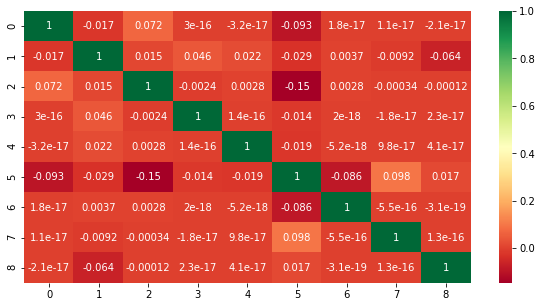

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(),annot=True,cmap='RdYlGn')

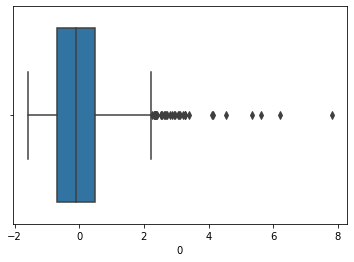

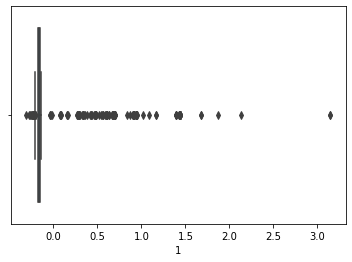

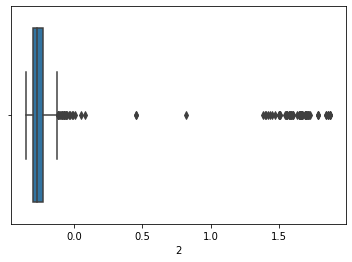

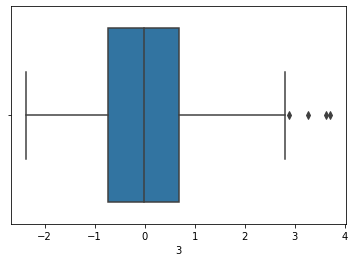

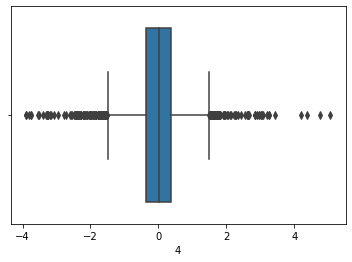

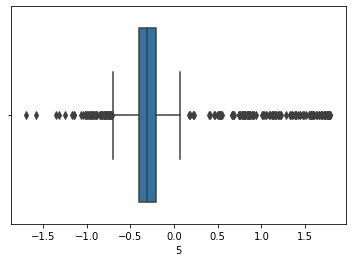

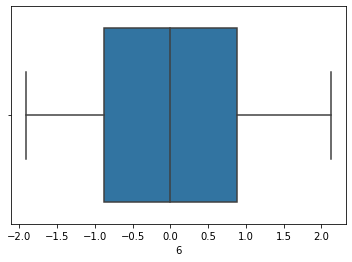

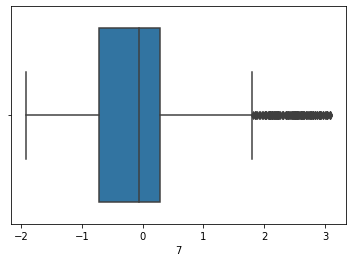

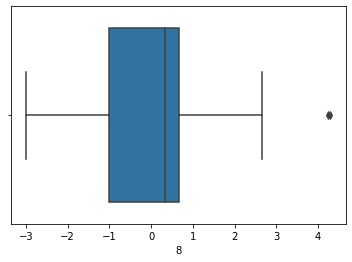

In [52]:
for i in x.columns:
    plt.figure()
    sns.boxplot(x[i])       # shows that some of the columns contain outliers

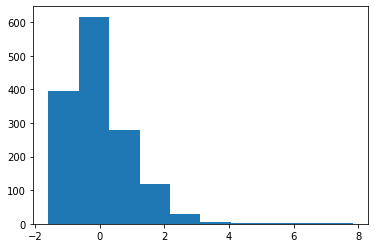

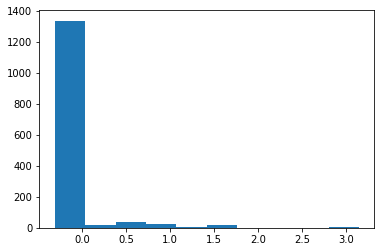

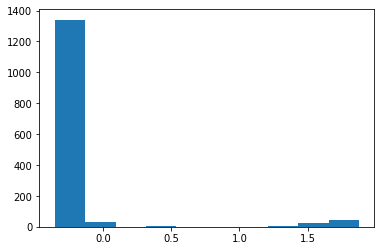

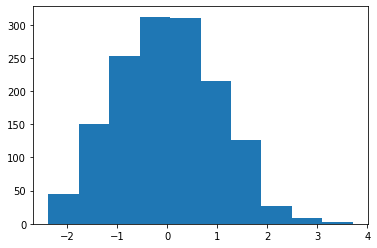

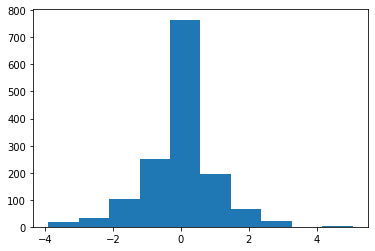

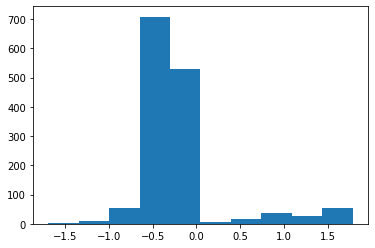

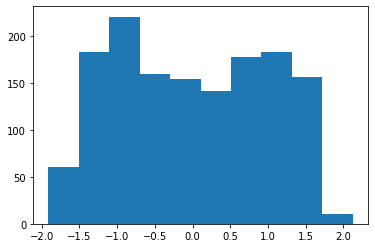

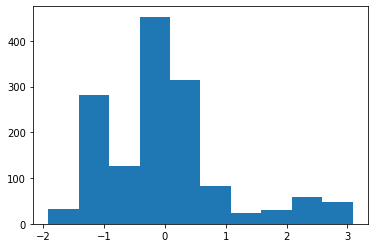

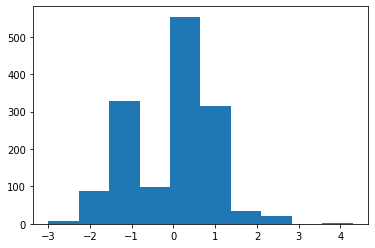

In [53]:
for i in x.columns:
    plt.figure()
    plt.hist(x[i])

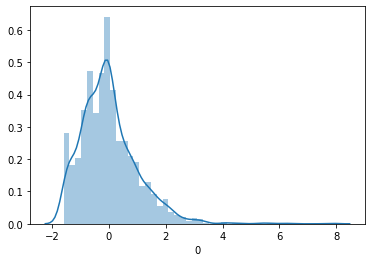

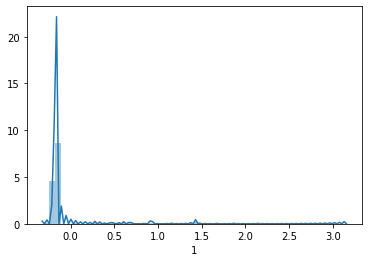

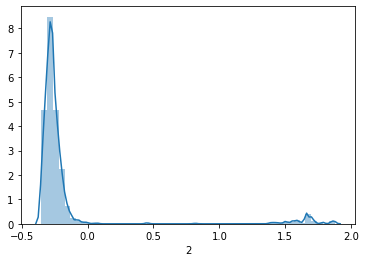

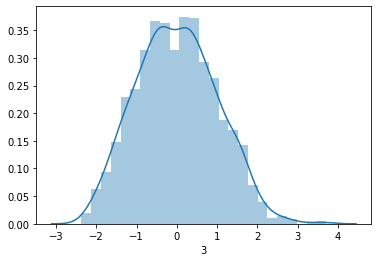

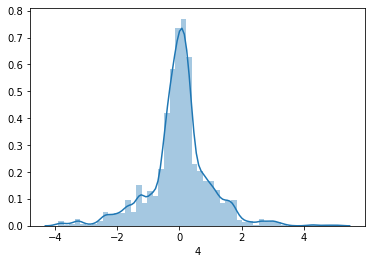

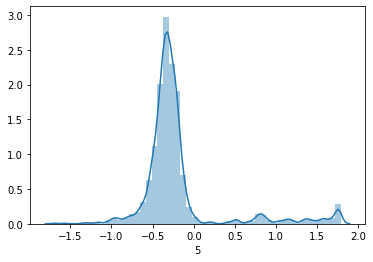

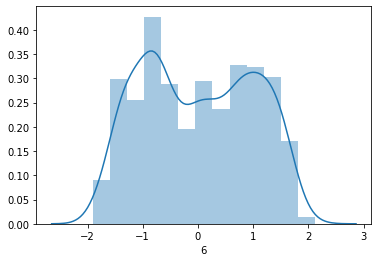

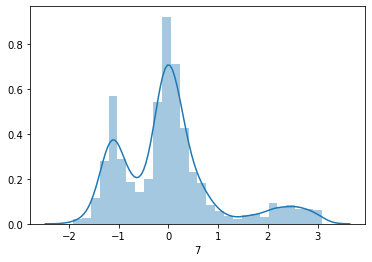

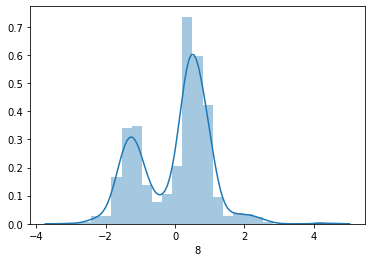

In [54]:
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])

In [55]:
#implementing using logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [57]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(pred,y_test)
    print("accuracy score corrosponding to random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("the max accuracy score for final random state",final_r_state,"is:",max_acc_score)

accuracy score corrosponding to random state: 42 is: 0.8103448275862069
accuracy score corrosponding to random state: 43 is: 0.7758620689655172
accuracy score corrosponding to random state: 44 is: 0.7965517241379311
accuracy score corrosponding to random state: 45 is: 0.8103448275862069
accuracy score corrosponding to random state: 46 is: 0.8103448275862069
accuracy score corrosponding to random state: 47 is: 0.8103448275862069
accuracy score corrosponding to random state: 48 is: 0.7827586206896552
accuracy score corrosponding to random state: 49 is: 0.7965517241379311
accuracy score corrosponding to random state: 50 is: 0.7827586206896552
accuracy score corrosponding to random state: 51 is: 0.7931034482758621
accuracy score corrosponding to random state: 52 is: 0.7827586206896552
accuracy score corrosponding to random state: 53 is: 0.7689655172413793
accuracy score corrosponding to random state: 54 is: 0.8172413793103448
accuracy score corrosponding to random state: 55 is: 0.789655172

In [58]:
#using cross val score

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
score=cross_val_score(lg,x,y,cv=5)

In [61]:
score

array([0.80689655, 0.8137931 , 0.80689655, 0.81034483, 0.79238754])

In [62]:
#implementing through other classification technique

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65,test_size=0.20)

In [65]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(gnb,"score","is:",accuracy_score(y_test,pred))

GaussianNB(priors=None, var_smoothing=1e-09) score is: 0.8620689655172413


In [66]:
a=['linear','rbf','poly']
for i in a:
    svc=SVC(kernel=i)
    svc.fit(x_train,y_train)
    pred1=svc.predict(x_test)
    print("accuracy score for kernel",i,"is:",accuracy_score(pred1,y_test))

score=cross_val_score(svc,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for kernel linear is: 0.8344827586206897
accuracy score for kernel rbf is: 0.8586206896551725
accuracy score for kernel poly is: 0.8517241379310345
cross val score is: 0.7894952869585967


In [67]:
#using hyper parameter for SVC

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
attr={'kernel':['poly','linear','rbf'],'C':[1,0,10]}

In [70]:
gd=GridSearchCV(estimator=SVC(),param_grid=attr)

In [71]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 0, 10], 'kernel': ['poly', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
gd.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
gd.best_params_

{'C': 1, 'kernel': 'rbf'}

In [74]:
gd.best_score_

0.8012313566400191

In [75]:
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred2=knn.predict(x_test)
    print("accuracy score for neighbors",i,"is:",accuracy_score(pred2,y_test))
    
score=cross_val_score(knn,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for neighbors 1 is: 0.7862068965517242
accuracy score for neighbors 2 is: 0.7862068965517242
accuracy score for neighbors 3 is: 0.7896551724137931
accuracy score for neighbors 4 is: 0.7965517241379311
accuracy score for neighbors 5 is: 0.7965517241379311
accuracy score for neighbors 6 is: 0.8068965517241379
accuracy score for neighbors 7 is: 0.7931034482758621
accuracy score for neighbors 8 is: 0.8103448275862069
accuracy score for neighbors 9 is: 0.8103448275862069
accuracy score for neighbors 10 is: 0.8344827586206897
accuracy score for neighbors 11 is: 0.8344827586206897
accuracy score for neighbors 12 is: 0.8310344827586207
accuracy score for neighbors 13 is: 0.8275862068965517
accuracy score for neighbors 14 is: 0.8241379310344827
accuracy score for neighbors 15 is: 0.8275862068965517
accuracy score for neighbors 16 is: 0.8379310344827586
accuracy score for neighbors 17 is: 0.8206896551724138
accuracy score for neighbors 18 is: 0.8206896551724138
accuracy score for 

In [76]:
a=['gini','entropy']
for i in a:
    dtc=DecisionTreeClassifier(criterion=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    print("accuracy score for criterion",i,"is",accuracy_score(y_test,pred))

accuracy score for criterion gini is 0.7724137931034483
accuracy score for criterion entropy is 0.7724137931034483


In [77]:
#boosting the result using ensembling techniques

In [78]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [79]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestClassifier(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('accuracy score at',i,'is:',accuracy_score(predrd,y_test))

accuracy score at 150 is: 0.8482758620689655
accuracy score at 200 is: 0.8310344827586207
accuracy score at 250 is: 0.8344827586206897
accuracy score at 300 is: 0.8482758620689655
accuracy score at 350 is: 0.8448275862068966


In [80]:
gd=GradientBoostingClassifier(learning_rate=0.1)

In [81]:
gd.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [82]:
predgd=gd.predict(x_test)

In [83]:
accuracy_score(predgd,y_test)

0.8482758620689655

In [103]:
b=[150,200,250,300,350]
for i in b:
    ad=AdaBoostClassifier(base_estimator=dtc,learning_rate=0.01)
    ad.fit(x_train,y_train)
    predad=ad.predict(x_test)
    print("accuracy score for the estimator",i,"is:",accuracy_score(y_test,predad))

accuracy score for the estimator 150 is: 0.7724137931034483
accuracy score for the estimator 200 is: 0.7724137931034483
accuracy score for the estimator 250 is: 0.7827586206896552
accuracy score for the estimator 300 is: 0.7655172413793103
accuracy score for the estimator 350 is: 0.7655172413793103


#conclusion:-so from the above implementation we can infer that we can achieve atmost of 84% accuracy with classifiers and maximum of 86% with logistic regressor so,we will finally use this model for saving the result

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65,test_size=0.20)

In [86]:
lg=LogisticRegression()

In [87]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
predlg=lg.predict(x_test)
a1=pd.DataFrame(data=predlg)
a1.to_csv('census result.csv')

In [89]:
accuracy_score(y_test,predlg)

0.8655172413793103

In [90]:
print(classification_report(y_test,predlg))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       231
           1       0.78      0.47      0.59        59

    accuracy                           0.87       290
   macro avg       0.83      0.72      0.75       290
weighted avg       0.86      0.87      0.85       290



In [91]:
print(confusion_matrix(y_test,predlg))

[[223   8]
 [ 31  28]]


In [92]:
#plotting auc roc curve

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [94]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [95]:
y_pred_prob

array([0.12559895, 0.70543885, 0.08576463, 0.28147236, 0.95537458,
       0.44152068, 0.10411411, 0.11449072, 0.35821665, 0.01232347,
       0.60993022, 0.01105948, 0.22157396, 0.71510359, 0.31223475,
       0.0578595 , 0.38377376, 0.03173355, 0.12049778, 0.33325176,
       0.02493884, 0.53126016, 0.24843824, 0.20162939, 0.01965241,
       0.24244822, 0.04190141, 0.0906095 , 0.99198955, 0.24761398,
       0.07570021, 0.55380718, 0.60670056, 0.59413253, 0.00836981,
       0.27800275, 0.03149393, 0.08404912, 0.05628649, 0.00906147,
       0.09209141, 0.08868676, 0.18336343, 0.42418122, 0.30956935,
       0.03637228, 0.07295491, 0.09867   , 0.09045218, 0.29716826,
       0.07918537, 0.14885527, 0.1138231 , 0.19614463, 0.14538098,
       0.27931907, 0.15209431, 0.96423843, 0.74243156, 0.31570642,
       0.13285052, 0.20397397, 0.14165488, 0.57137318, 0.67032154,
       0.05440105, 0.04760964, 0.104319  , 0.08530017, 0.01519429,
       0.02854428, 0.04528089, 0.09699584, 0.43989716, 0.00654

In [96]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [97]:
print("fpr is:",fpr)
print("tpr is:",tpr)
print("threshold is:",threshold)

fpr is: [0.         0.         0.         0.004329   0.004329   0.00865801
 0.00865801 0.01298701 0.01298701 0.01731602 0.01731602 0.02164502
 0.02164502 0.03896104 0.03896104 0.04329004 0.04329004 0.05627706
 0.05627706 0.06926407 0.06926407 0.09090909 0.09090909 0.12554113
 0.12554113 0.12987013 0.12987013 0.13419913 0.13419913 0.13852814
 0.13852814 0.14285714 0.14285714 0.16017316 0.16017316 0.22943723
 0.22943723 0.23809524 0.23809524 0.26406926 0.26406926 0.31601732
 0.31601732 0.35497835 0.35497835 0.44588745 0.44588745 0.47619048
 0.47619048 0.48484848 0.48484848 0.52380952 0.52380952 0.55844156
 0.55844156 0.58874459 0.58874459 0.67965368 0.67965368 1.        ]
tpr is: [0.         0.01694915 0.23728814 0.23728814 0.25423729 0.25423729
 0.27118644 0.27118644 0.38983051 0.38983051 0.42372881 0.42372881
 0.47457627 0.47457627 0.54237288 0.54237288 0.57627119 0.57627119
 0.59322034 0.59322034 0.61016949 0.61016949 0.62711864 0.62711864
 0.66101695 0.66101695 0.6779661  0.6779661  

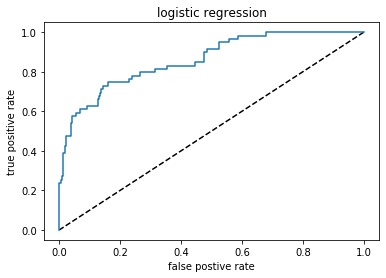

In [98]:
plt.plot([1,0],[1,0],'k--')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel('false postive rate')
plt.ylabel("true positive rate")
plt.title("logistic regression")
plt.show()

In [99]:
#saving the final model

In [100]:
import joblib

In [101]:
joblib.dump(lg,'census.obj')

['census.obj']